Credentials are already in use. The existing account in the session will be replaced.


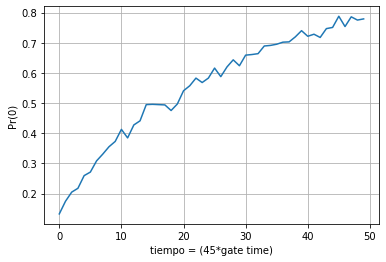

In [17]:
# Empecemos trabajando con la relajación energética



# Importamos las librerías necesarias:

import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, execute, IBMQ, Aer



# El computador con el que trabajaremos será 'imbq_armonk' (podeis elegir cualquier otro)

provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_armonk')


# Creamos los circuitos, empezando con un qubit en estado |1>

pre = QuantumCircuit(1, 1)
pre.x(0)
pre.barrier()

meas = QuantumCircuit(1, 1)
meas.measure(0, 0)

circuits = []
num_circ = range(50) # indicamos el número de circuitos que queremos crear


# En este 'for' estamos diciendo que cada circuito tenga 45 puertas identidad más que el anterior
# representando así el tiempo que dejamos el estado sin tocarlo

for i in num_circ: 
    middle = QuantumCircuit(1, 1)
    for j in range(45*i):
        middle.iden(0)
    circuits.append(pre + middle + meas)

    
# Ejecutamos los circuitos
shots = 1024
job = execute(circuits, backend, shots=shots)
result = job.result()

# Veamos los resultados

datos = []
for i in num_circ:
    data = result.get_counts(i)
    try:                      # try/except se utiliza para manejar errores
        p0 = data['0']/shots  # esto es la probabilidad de que esté en estado 0 (casos favorables / casos totales)
    except KeyError:
        p0 = 0
    datos.append(p0)
   

plt.plot(num_circ, datos)
plt.xlabel('tiempo = (45*gate time)')
plt.ylabel('Pr(0)')
plt.grid(True)


# Como se puede ver, el estado |1> tiende hacia el estado |0>

Credentials are already in use. The existing account in the session will be replaced.


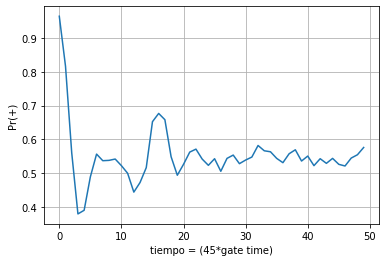

In [22]:
# Haremos lo mismo, pero esta vez dejaremos el ket positivo
# y veremos cual es la probabilidad de que siga siendo positivo


import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, execute, IBMQ, Aer


provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_armonk')


pre = QuantumCircuit(1, 1)
pre.h(0)            
pre.barrier()

meas = QuantumCircuit(1, 1)
meas.h(0)                            # medimos respecto al eje x (+,-)
meas.measure(0, 0)

circuits = []
num_circ = range(50) # indicamos el número de circuitos que queremos crear


# En este 'for' estamos diciendo que cada circuito tenga 45 puertas identidad más que el anterior
# representando así el tiempo que dejamos el estado sin tocarlo

for i in num_circ: 
    middle = QuantumCircuit(1, 1)
    for j in range(45*i):
        middle.iden(0)
    circuits.append(pre + middle + meas)

    
# Ejecutamos los circuitos
shots = 1024
job = execute(circuits, backend, shots=shots)
result = job.result()

# Veamos los resultados

datos = []
for i in num_circ:
    data = result.get_counts(i)
    try:                      
        p0 = data['0']/shots  
    except KeyError:
        p0 = 0
    datos.append(p0)
   

plt.plot(num_circ, datos)
plt.xlabel('tiempo = (45*gate time)')
plt.ylabel('Pr(+)')
plt.grid(True)


